# LOESS - Locally Estimated Scatterplot Smoothing
___

**LOESS** is a **non-parametric** type of **smoother** (though *Linear Regression* is used as its core), which idea is to recover the **true signal** from a **noisy** sample.\
It is used with different types of the same regression model to smooth out small and localized areas of the signal.\
\
So, in other words, instead of taking **one Linear Regression**, which would be quite strange, we take **multiple number of Linear Regressions** to smooth little area, thus getting some points of our **locally smoothed data**. After combining all data points from the whole number of Linear Regressions(smoothing) we used, we get a **non-linear data without  noise**.

## How does LOESS work?

For each value of **x** we estimate **y(x)** using its neighboring samples.\
The first step is to collect values of **x**, lets call them $x_1$ to estimate our $\hat{y}$.\
Now for $x_1$, we must find its **k nearest neighbors** using a simple **Euclidean distance**\
Let the set of distances be called $D$\
The next step is to convert our set $D$ to set of weights $W$ using tricubic weighting function:
$w(x) = \begin{cases} (1 - |x|^3)^3 & |x|<1\\
0 & |x| \geq 1 \end {cases}$
\
As the function only has positive results for -1 < x < 1, we normalize the distance by dividing it by the maximum value observed in our distance.
\
\
So now we have our equasion like:\
<font size = 4.5>$w(x) = \begin{cases} (1 - |\frac{d(x, x_1)}{max_i \space d(x_i,x_1)}|^3)^3 & |x|<1, d(x_i, x_1) \in D\\
0 & |x| \geq 1 \end {cases}$</font>\
\
\
Now it's time to estimate our $\hat{y}$ using Linear Regression:\
\
All we have to do is:
\
<font size = 4.5>$\overline{x} = \frac {\sum \limits _{1} ^{d} w_i\cdot x_i} {\sum \limits _{1} ^{d} w_i} \\
\overline{y} = \frac {\sum \limits _{1} ^{d} w_i\cdot y_i} {\sum \limits _{1} ^{d} w_i} \\
\beta_1 = \frac {\sum \limits _{1} ^{d} w_i\cdot x_i\cdot y_i\cdot - \overline{x}\cdot\overline{y} \cdot \sum \limits _{1} ^{d} w_i}
{\sum \limits _{1} ^{d} w_i \cdot x_i^2 \space-\space \overline{x}^2 \cdot \sum \limits _{1} ^{d} w_i}\\
\\
\beta_0 = \overline{y} - \beta_1 \overline{x} \\
\\
\hat{y} = \beta_0 + \beta_1 x$</font>\
\
Then we take one point of our estimated $\hat{y}$ that shares its $x$ with our first, focal data point we used in regression and go on to the next range of points, to get the smoothed data.
\
Also after this we have to do our job one more time but now reweighting the points this way: the  more distance original point there is from estimated, the less weight the estimated has.

## Application:

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

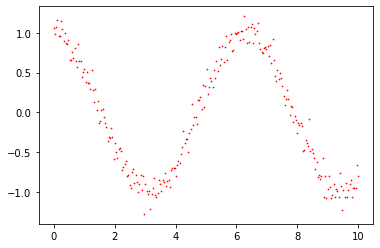

In [2]:
#Creating data with noise, as our prototype
#For example, I will create a cosine line with a little bit of noise
X = np.linspace(0,10,250)
Y = np.cos(X)
RS = np.random.RandomState(42)
y_n = np.array([Y[i] + RS.randn()/9 for i in range(len(Y))])
plt.scatter(X, y_n, s = 0.5, c = 'red')

In [3]:
#importing model and using it

from statsmodels.nonparametric.smoothers_lowess import lowess
#get estimated non-linear graph
y_est = lowess(y_n, X, frac = 0.1, it = 3, return_sorted = False)

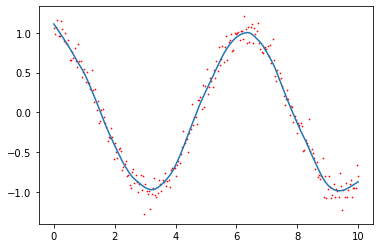

In [4]:
#Now let's compare our noisy data with estimated one
plt.plot(X, y_est)
plt.scatter(X, y_n, s = 0.5, c = 'red')